In [49]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import cv2
from myshow import myshow
import sys
import sys
sys.path.append('include')
from scipy.io import loadmat, savemat
import cardiacDicomGlobals as cdg
import pandas as pd
import seaborn as sns
from scipy import stats


In [50]:



df = pd.DataFrame()
ind = 0
for patient in cdg.patientList:
    
    
    inFileName = "B0CorrectedImages/" + patient.mfr + ".mat"
    x = loadmat(inFileName)
    peakSignalMFI = np.transpose(x['peakSignalMFI'])    
    peakSignalSeg = np.transpose(x['peakSignalSeg'])    
    peakSignalUncorr = np.transpose(x['peakSignalUncorr'])    
    
    freqAxis = x['globalFreqSearch']  


    readout = patient.readout    
    longOrShort = 'long'
    if readout.find('short')>0:
        longOrShort = 'short'
    
    resonanceIndex = cdg.closestIndex(freqAxis,0)
    
    
    dataList = []
    metList = ['bicarbonate', 'lactate','pyruvate']
    labelList = ['uncorrected']*3
    methodList = ['gradient']*3
    dataList.append(peakSignalUncorr[resonanceIndex,0])
    dataList.append(peakSignalUncorr[resonanceIndex,1])
    dataList.append(peakSignalUncorr[resonanceIndex,2])
    
    metList.extend(['bicarbonate', 'lactate','pyruvate'])
    labelList.extend(['global shift only']*3)
    methodList.extend(['gradient']*3)
    dataList.append(peakSignalUncorr[:,0].max())
    dataList.append(peakSignalUncorr[:,1].max())
    dataList.append(peakSignalUncorr[:,2].max())
    
    metList.extend(['bicarbonate', 'lactate','pyruvate'])
    labelList.extend(['MFI']*3)
    methodList.extend(['gradient']*3)
    dataList.append(peakSignalMFI[:,0].max())
    dataList.append(peakSignalMFI[:,1].max())
    dataList.append(peakSignalMFI[:,2].max())
    
    metList.extend(['bicarbonate', 'lactate','pyruvate'])
    labelList.extend(['Segmented']*3)
    methodList.extend(['gradient']*3)
    dataList.append(peakSignalSeg[:,0].max())
    dataList.append(peakSignalSeg[:,1].max())
    dataList.append(peakSignalSeg[:,2].max())

    df1 = pd.DataFrame(data=dataList, columns= ['objective function'])
    df2 = pd.DataFrame(data=labelList, columns= ['labels'])
    df3 = pd.DataFrame(data=[longOrShort]*len(dataList), columns= ['readout'])
    df4 = pd.DataFrame(data=metList, columns= ['metabolite'])
    df5 = pd.DataFrame(data=methodList, columns= ['method'])
    df6 = pd.DataFrame(data=[int(ind)]*len(dataList), columns= ['subject'])
    dfn = pd.concat([df1,df2,df3,df4,df5,df6],axis=1)

    df = pd.concat([df,dfn],axis=0, ignore_index = True)
    


    
    ind += 1
    
df.head(30)

,objective function,labels,readout,metabolite,method,subject
0,28.336197,uncorrected,long,bicarbonate,gradient,0
1,28.727369,uncorrected,long,lactate,gradient,0
2,20851.891126,uncorrected,long,pyruvate,gradient,0
3,46.159145,global shift only,long,bicarbonate,gradient,0
4,31.678228,global shift only,long,lactate,gradient,0
5,41860.165552,global shift only,long,pyruvate,gradient,0
6,51.999301,MFI,long,bicarbonate,gradient,0
7,30.139890,MFI,long,lactate,gradient,0
8,37544.388108,MFI,long,pyruvate,gradient,0
9,51.737373,Segmented,long,bicarbonate,gradient,0


In [51]:

ind = 0

#for patient in cdg.patientList:
dfi = df[df['subject']==ind]

dfi


,objective function,labels,readout,metabolite,method,subject
0,28.336197,uncorrected,long,bicarbonate,gradient,0
1,28.727369,uncorrected,long,lactate,gradient,0
2,20851.891126,uncorrected,long,pyruvate,gradient,0
3,46.159145,global shift only,long,bicarbonate,gradient,0
4,31.678228,global shift only,long,lactate,gradient,0
5,41860.165552,global shift only,long,pyruvate,gradient,0
6,51.999301,MFI,long,bicarbonate,gradient,0
7,30.139890,MFI,long,lactate,gradient,0
8,37544.388108,MFI,long,pyruvate,gradient,0
9,51.737373,Segmented,long,bicarbonate,gradient,0


In [52]:
dfi = df[df['subject']==0]

dfi

,objective function,labels,readout,metabolite,method,subject
0,28.336197,uncorrected,long,bicarbonate,gradient,0
1,28.727369,uncorrected,long,lactate,gradient,0
2,20851.891126,uncorrected,long,pyruvate,gradient,0
3,46.159145,global shift only,long,bicarbonate,gradient,0
4,31.678228,global shift only,long,lactate,gradient,0
5,41860.165552,global shift only,long,pyruvate,gradient,0
6,51.999301,MFI,long,bicarbonate,gradient,0
7,30.139890,MFI,long,lactate,gradient,0
8,37544.388108,MFI,long,pyruvate,gradient,0
9,51.737373,Segmented,long,bicarbonate,gradient,0


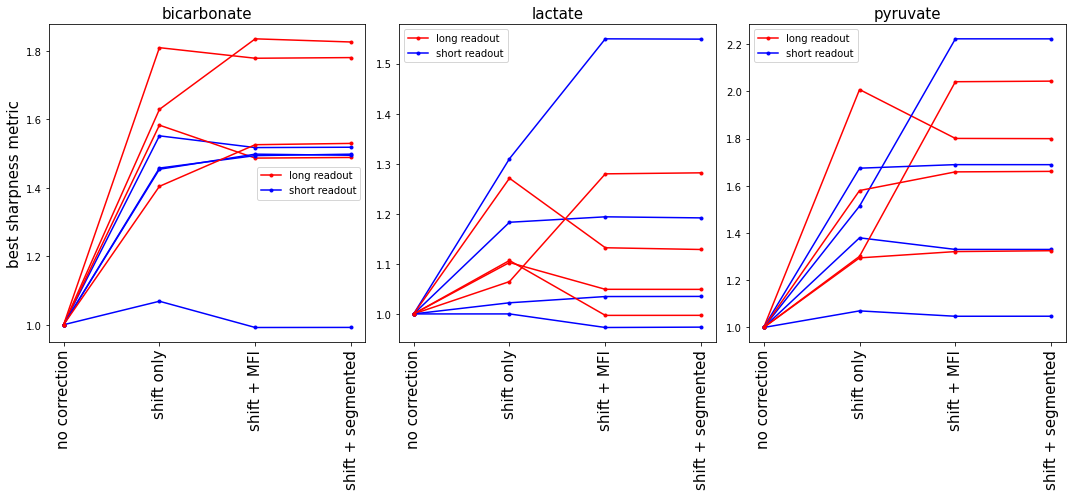

In [53]:

ind = 0
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,7))  

l1 = [1,2,3,4]
#l1 = [1,2,3]

# for storing percents
#dfp = pd.DataFrame()
bicarb_short_mfi = []
bicarb_long_mfi = []
lactate_short_mfi = []
lactate_long_mfi = []
pyruvate_short_mfi = []
pyruvate_long_mfi = []

bicarb_short_shift = []
bicarb_long_shift = []
lactate_short_shift = []
lactate_long_shift = []
pyruvate_short_shift = []
pyruvate_long_shift = []


for patient in cdg.patientList:
 
    dfi = df[df['subject']==ind]
    
    readoutSeries = dfi[(dfi['labels']=='uncorrected' ) & (dfi['metabolite']=='bicarbonate')]['readout']
    readout = readoutSeries.iloc[0]
    pltcolor = 'b.-'
    if readout == 'long':
        pltcolor = 'r.-'
    
    
    
    f1 = float(dfi[(dfi['labels']=='uncorrected' ) & (dfi['metabolite']=='bicarbonate')]['objective function'])
    f2 = float(dfi[(dfi['labels']=='global shift only' ) & (dfi['metabolite']=='bicarbonate')]['objective function'])
    f3 = float(dfi[(dfi['labels']=='MFI' ) & (dfi['metabolite']=='bicarbonate')]['objective function'])
    f4 = float(dfi[(dfi['labels']=='Segmented' ) & (dfi['metabolite']=='bicarbonate')]['objective function'])
    l2 = [1.0, f2/f1, f3/f1, f4/f1]
    #l2 = [f2/f1, f3/f1, f4/f1]

    
    ax1.plot(l1,l2, pltcolor, label=readout +' readout')
    
    if readout == 'long':
        bicarb_long_mfi.append(f3/f1)
        bicarb_long_shift.append(f2/f1)
    else:
        bicarb_short_mfi.append(f3/f1)
        bicarb_short_shift.append(f2/f1)
    

    f1 = float(dfi[(dfi['labels']=='uncorrected' ) & (dfi['metabolite']=='lactate')]['objective function'])
    f2 = float(dfi[(dfi['labels']=='global shift only' ) & (dfi['metabolite']=='lactate')]['objective function'])
    f3 = float(dfi[(dfi['labels']=='MFI' ) & (dfi['metabolite']=='lactate')]['objective function'])
    f4 = float(dfi[(dfi['labels']=='Segmented' ) & (dfi['metabolite']=='lactate')]['objective function'])

    l2 = [1.0, f2/f1, f3/f1, f4/f1]
    #l2 = [f2/f1, f3/f1, f4/f1]

    ax2.plot(l1,l2, pltcolor, label=readout +' readout')
    
    if readout == 'long':
        lactate_long_mfi.append(f3/f1)
        lactate_long_shift.append(f2/f1)
    else:
        lactate_short_mfi.append(f3/f1)
        lactate_short_shift.append(f2/f1)
    
    f1 = float(dfi[(dfi['labels']=='uncorrected' ) & (dfi['metabolite']=='pyruvate')]['objective function'])
    f2 = float(dfi[(dfi['labels']=='global shift only' ) & (dfi['metabolite']=='pyruvate')]['objective function'])
    f3 = float(dfi[(dfi['labels']=='MFI' ) & (dfi['metabolite']=='pyruvate')]['objective function'])
    f4 = float(dfi[(dfi['labels']=='Segmented' ) & (dfi['metabolite']=='pyruvate')]['objective function'])

    l2 = [1.0, f2/f1, f3/f1, f4/f1]
    #l2 = [f2/f1, f3/f1, f4/f1]

    
    ax3.plot(l1,l2, pltcolor, label=readout +' readout')
    
    if readout == 'long':
        pyruvate_long_mfi.append(f3/f1)
        pyruvate_long_shift.append(f2/f1)
    else:
        pyruvate_short_mfi.append(f3/f1)
        pyruvate_short_shift.append(f2/f1)
    
    ind += 1

    
fs = 15
tr = 90
tickLabs = ['no correction', 'shift only', 'shift + MFI', 'shift + segmented']
#tickLabs = [ 'shift only', 'shift + MFI', 'shift + segmented']

handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys())    
ax1.set_title('bicarbonate', fontsize=fs)
ax1.set_xticks(l1)
ax1.set_xticklabels(tickLabs, rotation=tr, fontsize=fs)
ax1.set_ylabel('best sharpness metric', fontsize=fs)

ax2.legend(by_label.values(), by_label.keys())    
ax2.set_title('lactate', fontsize=fs)
ax2.set_xticks(l1)
ax2.set_xticklabels(tickLabs, rotation=tr, fontsize=fs)

ax3.legend(by_label.values(), by_label.keys())    
ax3.set_title('pyruvate', fontsize=fs)
ax3.set_xticks(l1)
ax3.set_xticklabels(tickLabs, rotation=tr, fontsize=fs)


fig.tight_layout()
fig.savefig('rawFigs/sharpnessMeasureAllSubjects.pdf')



In [54]:
def printMeanStd(x):
    print(str(np.mean(x)) + ' +/- ' + str(np.std(x)))

    

print('long readout')
print('bicarb mfi')
printMeanStd(bicarb_long_mfi)
print('lactate mfi')
printMeanStd(lactate_long_mfi)
print('pyruvate mfi')
printMeanStd(pyruvate_long_mfi)


print('bicarb shift')
printMeanStd(bicarb_long_shift)
print('lactate shift')
printMeanStd(lactate_long_shift)
print('pyruvate shift')
printMeanStd(lactate_long_shift)

print('\n\n')

print('short readout')

print('bicarb mfi')
printMeanStd(bicarb_short_mfi)
print('lactate mfi')
printMeanStd(lactate_short_mfi)
print('pyruvate mfi')
printMeanStd(pyruvate_short_mfi)


print('bicarb shift')
printMeanStd(bicarb_short_shift)
print('lactate shift')
printMeanStd(lactate_short_shift)
print('pyruvate shift')
printMeanStd(lactate_short_shift)


print('\n\n')

print('long and short joined')


bicarb_shift_joined =  bicarb_short_shift +  bicarb_long_shift
bicarb_mfi_joined =  bicarb_short_mfi +  bicarb_long_mfi
lactate_shift_joined =  lactate_short_shift +  lactate_long_shift
lactate_mfi_joined =  lactate_short_mfi +  lactate_long_mfi
pyruvate_shift_joined =  pyruvate_short_shift +  pyruvate_long_shift
pyruvate_mfi_joined =  pyruvate_short_mfi +  pyruvate_long_mfi

print('bicarb shift')
printMeanStd(bicarb_shift_joined)
print('bicarb MFI')
printMeanStd(bicarb_mfi_joined)

print(stats.ttest_rel(bicarb_shift_joined, bicarb_mfi_joined))

print('lactate shift')
printMeanStd(lactate_shift_joined)
print('lactate MFI')
printMeanStd(lactate_mfi_joined)
print(stats.ttest_rel(lactate_shift_joined, lactate_mfi_joined))

print('pyruvate shift')
printMeanStd(pyruvate_shift_joined)
print('pyruvate MFI')
printMeanStd(pyruvate_mfi_joined)
print(stats.ttest_rel(pyruvate_shift_joined, pyruvate_mfi_joined))

print('\n\n')


print(stats.ttest_rel(bicarb_long_shift, bicarb_long_mfi))
print(stats.ttest_rel(pyruvate_long_shift, pyruvate_long_mfi))
print(stats.ttest_rel(lactate_long_shift, lactate_long_mfi))

print(stats.ttest_rel(bicarb_short_shift, bicarb_short_mfi))
print(stats.ttest_rel(pyruvate_short_shift, pyruvate_short_mfi))
print(stats.ttest_rel(lactate_short_shift, lactate_short_mfi))


long readout
bicarb mfi
1.656520204182685 +/- 0.15217575940079459
lactate mfi
1.114571879114752 +/- 0.10690060047885347
pyruvate mfi
1.7053538375456032 +/- 0.26030861636577485
bicarb shift
1.6063622289311703 +/- 0.14413244799954245
lactate shift
1.136277592305218 +/- 0.07953770565037774
pyruvate shift
1.136277592305218 +/- 0.07953770565037774



short readout
bicarb mfi
1.3754173417089874 +/- 0.22156231764048648
lactate mfi
1.1877944942032368 +/- 0.2239066340638796
pyruvate mfi
1.5724641605869345 +/- 0.4387267527780091
bicarb shift
1.383033356496172 +/- 0.18569920481493996
lactate shift
1.1288619590087776 +/- 0.12625117283551168
pyruvate shift
1.1288619590087776 +/- 0.12625117283551168



long and short joined
bicarb shift
1.494697792713671 +/- 0.20024516207237777
bicarb MFI
1.5159687729458362 +/- 0.23638605288054282
Ttest_relResult(statistic=-0.5843375204056592, pvalue=0.5773315169481528)
lactate shift
1.132569775656998 +/- 0.10557722545857609
lactate MFI
1.1511831866589946 +/- 0.1792

In [55]:
df_peak = df[df['method'] == 'peak signal']
df_grad = df[df['method'] == 'gradient']


df_bg = df_grad[df_grad['metabolite'] == 'bicarbonate']
df_pg = df_grad[df_grad['metabolite'] == 'pyruvate']
df_lg = df_grad[df_grad['metabolite'] == 'lactate']

df_bp = df_peak[df_peak['metabolite'] == 'bicarbonate']
df_pp = df_peak[df_peak['metabolite'] == 'pyruvate']
df_lp = df_peak[df_peak['metabolite'] == 'lactate']




Text(0.5, 1.0, 'bicarbonate')

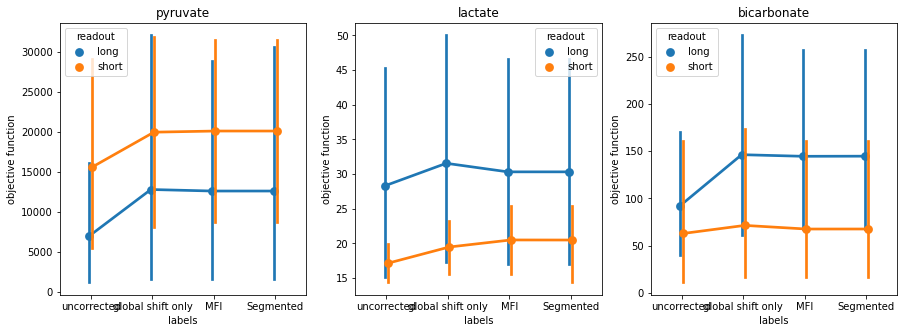

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

sns.pointplot(x="labels", y="objective function", hue="readout", data=df_pg , dodge=True, ax=ax1)
sns.pointplot(x="labels", y="objective function", hue="readout", data=df_lg , dodge=True, ax=ax2)
sns.pointplot(x="labels", y="objective function", hue="readout", data=df_bg , dodge=True,ax=ax3)
ax1.set_title('pyruvate')
ax2.set_title('lactate')
ax3.set_title('bicarbonate')




#ax1 = sns.catplot(x="labels", y="objective function", hue="readout", data=df_p , kind='point')

load the corrected and uncorrected images, generated in the previous notebook

In [57]:


cdg.patientList

